# Results from DFT Calculations
This jupyter notebook extracts the results from the DFT calculations given from VASP.

## Interlayer Energy calculations
Extracting the data from the text files and visualize the data in plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [2]:
from python_scripts.layers.interlayer import lldistance

mypath = 'Fall2020/Layers/L_L_distance/Results/Run2'

pbe, dft_d3, lda, rev, vdw = lldistance(mypath)

x = np.linspace(0.0, 5.0, 11)
n = 24

df=pd.DataFrame({'x': x, 'PBE': pbe/n, 'DFT_D3': dft_d3/n, 'LDA': lda/n, 
    'rev_vdW_DF2': rev/n, 'vdW-opt88': vdw/n})
 


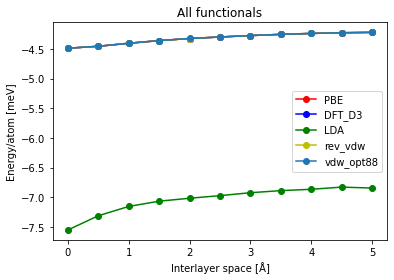

In [3]:
plt.plot(x, pbe/n, "-or")
plt.plot(x, dft_d3/n, "-ob")
plt.plot(x, lda/n, "-og")
plt.plot(x, rev/n, "-oy")
plt.plot(x, vdw/n, "-o")
plt.legend(["PBE", "DFT_D3", "LDA", "rev_vdw", "vdw_opt88"])
plt.title("All functionals")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

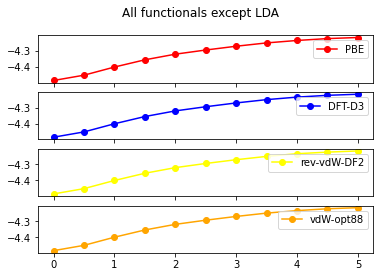

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.suptitle('All functionals except LDA')


ax1.plot('x', 'PBE', data=df, marker='o', color="red", label='PBE')
ax1.legend(loc="upper right")


ax2.plot('x','DFT_D3', data=df, marker='o', color="blue", label='DFT-D3')
ax2.legend(loc="upper right")

ax3.plot('x','rev_vdW_DF2', data=df, marker='o', color="yellow", label='rev-vdW-DF2')
ax3.legend(loc="upper right")

ax4.plot('x','vdW-opt88', data=df, marker='o', color="orange", label='vdW-opt88')
ax4.legend(loc="upper right")

plt.show()


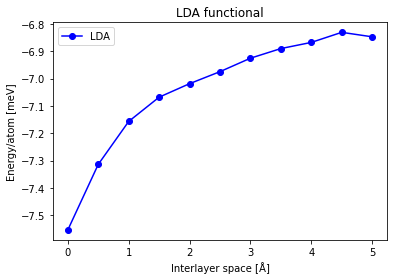

In [5]:
plt.plot(x, lda/n, "-ob")
plt.legend(["LDA"])
plt.title("LDA functional")
plt.xlabel("Interlayer space [Å]")
plt.ylabel("Energy/atom [meV]")
plt.show()

## Relaxation of Layer structures
Extracting the data from the text files and visualize the data in a table

In [6]:
from python_scripts.functions.data import readFilesFromDirectory, readEnergyFromFile

thisdir = 'Fall2020/Layers/text_files'
filepaths, filenames = readFilesFromDirectory(thisdir)


data = readEnergyFromFile(filepaths, filenames)


In [76]:
from tabulate import tabulate

l1 = data['L1_etot.txt']
l2 = data['L2_etot.txt']
l3 = data['L3_etot.txt']
l4 = data['L4_etot.txt']
atoms = data['atoms.txt']

ba_si_2D = atoms[0] + atoms[1]
ba_si_3D = atoms[2] + atoms[3]

def evenlayer(lx, lt, atom):
    # Prints the values in a nice tabulated form
    le = []
    i = 1
    for l in lx:
        if i == 4:
            column = 'Normal_Relax', l, l-lx[-1], l - atom
        elif i == 5:
            column = 'Unrelaxed', l, l-lx[-1], l - atom
        else:
            column = 'Relax_' + str(i), l, l-lx[-1], l - atom
    
        le.append(column)
        i +=1
    print(tabulate(le, headers=[lt,"Etot", "Rel-Unrel", "Rel-Atom"]))

def oddlayer(lx, lt, atom):
    # Prints the values in a nice tabulated form
    lo = []
    for l in lx:
        
        if l == lx[-1]:
            column = 'Unrelaxed', l, l-lx[-1], l - atom
        else:
            column = 'Relax', l, l-lx[-1], l - atom
    
        lo.append(column)
    print(tabulate(lo, headers=[lt,"Etot", "Rel-Unrel", "Rel-Atom"]))



## Tables of energy data

In [77]:
oddlayer(l1, "Layer 1", ba_si_2D)


Layer 1        Etot    Rel-Unrel    Rel-Atom
---------  --------  -----------  ----------
Relax      -44.4607      -3.1842    -7.75402
Unrelaxed  -41.2766       0         -4.56982


In [78]:
evenlayer(l2, "Layer 2", 2*ba_si_2D)

Layer 2           Etot    Rel-Unrel    Rel-Atom
------------  --------  -----------  ----------
Relax_1       -91.3016     -1.38574    -17.8882
Relax_2       -91.3016     -1.38574    -17.8882
Relax_3       -91.3016     -1.38574    -17.8882
Normal_Relax  -91.3006     -1.38468    -17.8871
Unrelaxed     -89.9159      0          -16.5024


In [79]:
oddlayer(l3, "Layer 3", 3*ba_si_2D)

Layer 3        Etot    Rel-Unrel    Rel-Atom
---------  --------  -----------  ----------
Relax      -139.913     -1.25641    -29.7926
Unrelaxed  -138.656      0          -28.5362


In [80]:
evenlayer(l4, "Layer 4", 4*ba_si_2D)

Layer 4           Etot    Rel-Unrel    Rel-Atom
------------  --------  -----------  ----------
Relax_1       -188.607     -1.26516    -41.7805
Relax_2       -188.607     -1.26516    -41.7805
Relax_3       -188.607     -1.26516    -41.7805
Normal_Relax  -188.605     -1.2628     -41.7782
Unrelaxed     -187.342      0          -40.5154
